In [ ]:
'''

분류
나이브 베이즈
판별분석
로지스틱 회귀
서포트벡터 머신
분류 모델 평가하기
불균형 데이터 다루기

통계적 머신러닝
k-최근접 이웃
트리 모델
배깅과 랜덤 포레스트
부스팅

'''

'\n\n분류\n나이브 베이즈\n판별분석\n로지스틱 회귀\n서포트벡터 머신\n분류 모델 평가하기\n불균형 데이터 다루기\n\n통계적 머신러닝\nk-최근접 이웃\n트리 모델\n배깅과 랜덤 포레스트\n부스팅\n\n'

In [ ]:
'''
나이브 베이즈 (Naive Bayes)

확률 계산: 각 클래스에 대한 사전 확률과 조건부 확률을 계산합니다. (각 특징이 독립적이라고 가정하여 계산을 단순화합니다.)

베이즈 정리 적용: 베이즈 정리를 사용하여 각 클래스의 사후 확률을 계산합니다.

분류: 사후 확률이 가장 높은 클래스로 분류합니다.
'''

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 나이브 베이즈 모델 생성 및 훈련
model = GaussianNB()  # 가우시안 나이브 베이즈 모델 생성
model.fit(X_train, y_train)  # 모델 훈련

# 예측
y_pred = model.predict(X_test)  # 테스트 세트에 대한 예측

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print(f'Accuracy: {accuracy:.2f}')  # 정확도 출력

Accuracy: 0.97


In [ ]:
'''
판별분석 (Discriminant Analysis)

평균과 공분산 계산: 각 클래스의 평균 벡터와 공분산 행렬을 계산합니다.

판별 함수 생성: 선형 또는 이차 판별 함수를 생성합니다.

분류: 판별 함수를 사용하여 각 데이터 포인트를 분류합니다.
'''

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# LDA 모델 생성 및 훈련
lda = LinearDiscriminantAnalysis()  # 선형 판별분석 모델 생성
lda.fit(X_train, y_train)  # 모델 훈련

# 예측
y_pred = lda.predict(X_test)  # 테스트 세트에 대한 예측

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print(f'Accuracy: {accuracy:.2f}')  # 정확도 출력

Accuracy: 1.00


In [ ]:
'''
서포트벡터 머신 (Support Vector Machine, SVM)

초평면 찾기: 데이터 포인트를 분리하는 최적의 초평면을 찾습니다.

마진 최대화: 최대 마진을 가지는 초평면을 선택합니다.
커널 트릭을 사용하여 비선형 분류를 수행할 수 있습니다

분류: 초평면을 기준으로 데이터 포인트를 분류합니다.
'''

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM 모델 생성 및 훈련
svm = SVC(kernel='linear')  # 선형 커널을 사용하는 SVM 모델 생성
svm.fit(X_train, y_train)  # 모델 훈련

# 예측
y_pred = svm.predict(X_test)  # 테스트 세트에 대한 예측

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print(f'Accuracy: {accuracy:.2f}')  # 정확도 출력


Accuracy: 1.00


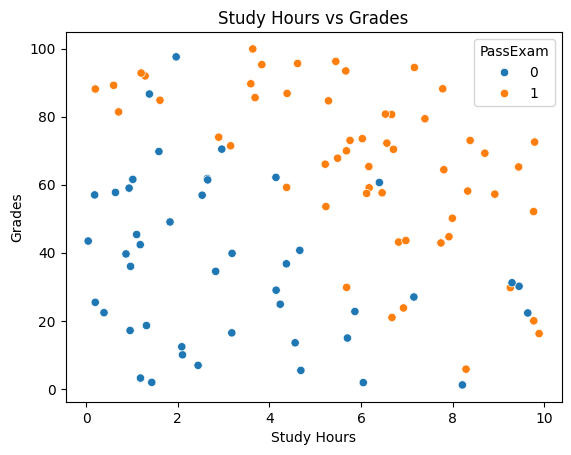

Accuracy: 0.8
Confusion Matrix:
[[9 2]
 [2 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20

Coefficients: [[0.7898547  0.08738328]]
Intercept: [-8.15939528]


In [ ]:
'''
로지스틱 회귀

오즈(odds) 계산:

로짓(logit) 함수:

로짓 함수는 오즈의 자연 로그를 취한 값입니다.
로짓 함수는 선형 회귀 모델의 출력을 확률로 변환하는 데 사용됩니다.

로지스틱 회귀 모델:
로지스틱 회귀 모델은 로짓 함수를 사용하여 독립 변수와 종속 변수 간의 관계를 모델링합니다.

확률 계산:
로지스틱 회귀 모델의 출력을 확률로 변환합니다.
​
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 생성 (예시)
np.random.seed(0)  # 랜덤 시드 설정
study_hours = np.random.rand(100) * 10  # 0에서 10 사이의 랜덤한 공부 시간
grades = np.random.rand(100) * 100  # 0에서 100 사이의 랜덤한 성적
pass_exam = (study_hours + grades / 10 + np.random.randn(100) * 2 > 10).astype(int)  # 합격 여부 (0 또는 1)

# 데이터프레임 생성
data = pd.DataFrame({'StudyHours': study_hours, 'Grades': grades, 'PassExam': pass_exam})  # 데이터프레임 생성

# 데이터 시각화
sns.scatterplot(x='StudyHours', y='Grades', hue='PassExam', data=data)  # 산점도
plt.xlabel('Study Hours')  # x축 라벨
plt.ylabel('Grades')  # y축 라벨
plt.title('Study Hours vs Grades')  # 그래프 제목
plt.show()  # 그래프 출력

# 데이터 분할 (훈련 세트와 테스트 세트)
X = data[['StudyHours', 'Grades']]  # 독립 변수
y = data['PassExam']  # 종속 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 데이터 분할

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()  # LogisticRegression 모델 생성
model.fit(X_train, y_train)  # 모델 학습

# 예측
y_pred = model.predict(X_test)  # 테스트 세트 예측

# 평가
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
conf_matrix = confusion_matrix(y_test, y_pred)  # 혼동 행렬 계산
class_report = classification_report(y_test, y_pred)  # 분류 보고서 생성

print(f"Accuracy: {accuracy}")  # 정확도 출력
print(f"Confusion Matrix:\n{conf_matrix}")  # 혼동 행렬 출력
print(f"Classification Report:\n{class_report}")  # 분류 보고서 출력

# 로지스틱 회귀 계수 출력
print(f"Coefficients: {model.coef_}")  # 회귀 계수 출력
print(f"Intercept: {model.intercept_}")  # 절편 출력


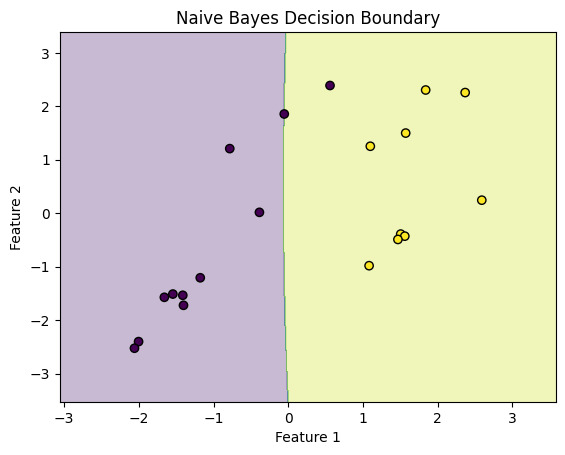

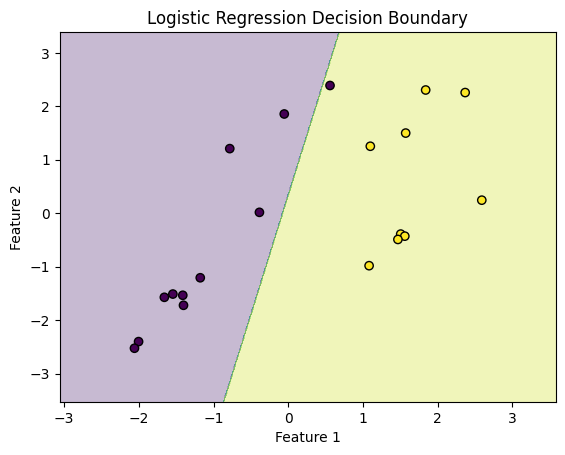

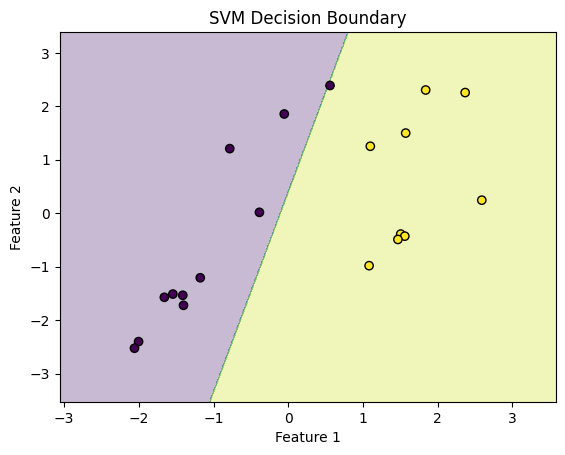

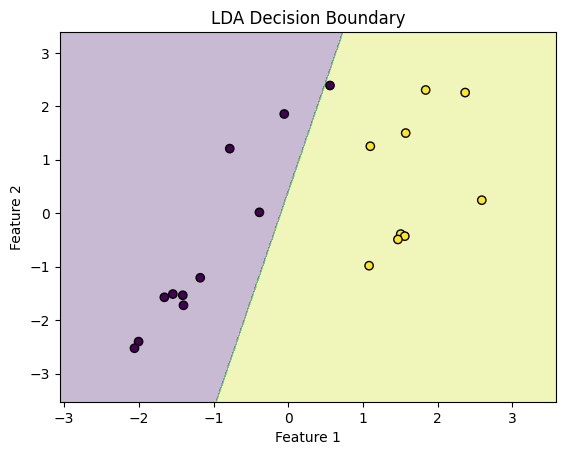

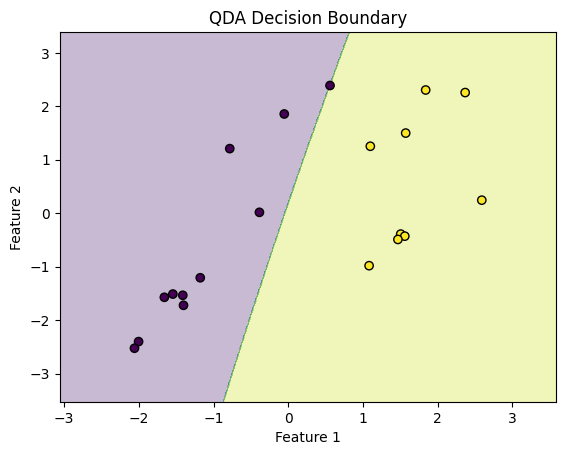

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# 데이터 생성
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 시각화를 위한 함수 정의
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 나이브 베이즈 모델 생성 및 훈련
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
plot_decision_boundary(nb_model, X_test, y_test, 'Naive Bayes Decision Boundary')

# 로지스틱 회귀 모델 생성 및 훈련
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
plot_decision_boundary(log_reg_model, X_test, y_test, 'Logistic Regression Decision Boundary')

# SVM 모델 생성 및 훈련
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
plot_decision_boundary(svm_model, X_test, y_test, 'SVM Decision Boundary')

# LDA 모델 생성 및 훈련
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
plot_decision_boundary(lda_model, X_test, y_test, 'LDA Decision Boundary')

# QDA 모델 생성 및 훈련
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
plot_decision_boundary(qda_model, X_test, y_test, 'QDA Decision Boundary')


Precision: 0.10
Recall: 0.62
F1 Score: 0.17
Confusion Matrix:
[[93 91]
 [ 6 10]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


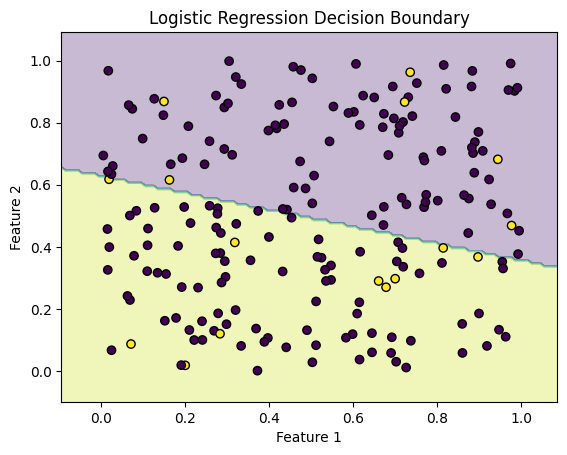

In [ ]:
'''
정밀도 (Precision): 모델이 양성으로 예측한 것 중 실제로 양성인 비율입니다.
예를 들어, 스팸 필터에서 정밀도는 스팸으로 분류된 이메일 중 실제로 스팸인 이메일의 비율을 나타냅니다.

재현율 (Recall): 실제 양성 중 모델이 양성으로 예측한 비율입니다.
예를 들어, 스팸 필터에서 재현율은 실제 스팸 이메일 중에서 스팸으로 정확히 분류된 이메일의 비율을 나타냅니다.
이 지표들은 특히 불균형 데이터셋에서 중요한데,
예를 들어, 의료 진단에서 질병이 있는 환자를 놓치지 않는 것이 중요할 때 재현율이 중요한 역할을 합니다.
반면, 스팸 필터에서 정밀도가 중요할 수 있습니다.
'''

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# 데이터 생성
np.random.seed(0)
n_samples = 1000  # 샘플 수
n_features = 2  # 특징 수
X = np.random.rand(n_samples, n_features)  # 독립 변수
y = np.zeros(n_samples)  # 종속 변수 초기화 (모두 0으로 설정)

# 소수 클래스 (질병이 있는 경우) 생성
n_minority = int(0.1 * n_samples)  # 소수 클래스 비율 (10%)
y[:n_minority] = 1  # 소수 클래스 설정

# 데이터 섞기
indices = np.arange(n_samples)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# 데이터프레임으로 변환
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=['Feature 1', 'Feature 2', 'Target'])

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(data[['Feature 1', 'Feature 2']], data['Target'], test_size=0.2, random_state=0)

# SMOTE를 사용하여 데이터 균형 맞추기 <<<   실제로는 데이터를 생성하고 줄일때 매우 신중을 가해야함
smote = SMOTE(random_state=0)  # SMOTE 객체 생성
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # 데이터 균형 맞추기

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression()  # 로지스틱 회귀 모델 생성
model.fit(X_resampled, y_resampled)  # 모델 훈련

# 예측
y_pred = model.predict(X_test)  # 테스트 세트에 대한 예측

# 정밀도, 재현율, F1 점수 계산
precision = precision_score(y_test, y_pred)  # 정밀도 계산
recall = recall_score(y_test, y_pred)  # 재현율 계산
f1 = f1_score(y_test, y_pred)  # F1 점수 계산

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')  # 정밀도 출력
print(f'Recall: {recall:.2f}')  # 재현율 출력
print(f'F1 Score: {f1:.2f}')  # F1 점수 출력
print('Confusion Matrix:')
print(conf_matrix)  # 혼동 행렬 출력

# 시각화
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 분류선 시각화
plot_decision_boundary(model, X_test.values, y_test.values, 'Logistic Regression Decision Boundary')


In [ ]:
'''
불균형 데이터가 일으킬 수 있는 문제

모델 성능 저하:
예시: 의료 진단 시스템에서 전체 환자 중 95%가 건강하고 5%만이 질병을 가지고 있는 경우, 모델이 모든 환자를 건강하다고 예측해도 95%의 정확도를 가질 수 있습니다. 그러나 이는 질병을 가진 환자를 놓치는 심각한 문제를 초래합니다.
위험: 중요한 소수 클래스(질병 환자)를 무시하게 되어 실제로 중요한 예측을 놓칠 수 있습니다.

잘못된 예측:
예시: 금융 사기 탐지 시스템에서 사기 거래가 전체 거래의 1% 미만인 경우, 모델이 모든 거래를 정상으로 예측하면 높은 정확도를 가질 수 있지만, 실제로 중요한 사기 거래를 놓치게 됩니다.
위험: 사기 거래를 놓치게 되어 금융 손실이 발생할 수 있습니다.

클래스 불균형으로 인한 편향:
예시: 자율 주행 자동차의 객체 인식 시스템에서 보행자 데이터가 차량 데이터보다 훨씬 적은 경우, 모델이 보행자를 인식하지 못할 수 있습니다.
위험: 보행자를 인식하지 못해 사고가 발생할 수 있습니다.

불균형 데이터를 다루는 방법

오버샘플링 (Oversampling):
설명: 소수 클래스의 데이터를 복제하여 데이터 균형을 맞춥니다.
장점:
소수 클래스의 데이터를 늘려 모델이 소수 클래스를 더 잘 학습할 수 있습니다.
데이터 손실 없이 균형을 맞출 수 있습니다.
단점:
데이터의 중복이 발생하여 모델이 과적합될 수 있습니다.
데이터셋의 크기가 커져 학습 시간이 길어질 수 있습니다.

언더샘플링 (Undersampling):
설명: 다수 클래스의 데이터를 줄여서 데이터 균형을 맞춥니다.
장점:
데이터셋의 크기를 줄여 학습 시간이 단축될 수 있습니다.
과적합의 위험이 줄어듭니다.
단점:
중요한 정보를 가진 다수 클래스의 데이터를 잃을 수 있습니다.
데이터 손실로 인해 모델의 성능이 저하될 수 있습니다.

SMOTE (Synthetic Minority Over-sampling Technique):
설명: 소수 클래스의 데이터를 생성하여 데이터 균형을 맞춥니다.
장점:
소수 클래스의 데이터를 인위적으로 생성하여 데이터 균형을 맞출 수 있습니다.
데이터 중복 없이 새로운 데이터를 생성합니다.
단점:
생성된 데이터가 실제 데이터를 완벽히 반영하지 않을 수 있습니다.
복잡한 데이터셋에서는 효과가 떨어질 수 있습니다.
'''

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# 데이터 생성
np.random.seed(0)
n_samples = 1000  # 샘플 수
n_features = 2  # 특징 수
X = np.random.rand(n_samples, n_features)  # 독립 변수
y = np.zeros(n_samples)  # 종속 변수 초기화 (모두 0으로 설정)

# 소수 클래스 (질병이 있는 경우) 생성
n_minority = int(0.1 * n_samples)  # 소수 클래스 비율 (10%)
y[:n_minority] = 1  # 소수 클래스 설정

# 데이터 섞기
indices = np.arange(n_samples)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# 데이터프레임으로 변환
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=['Feature 1', 'Feature 2', 'Target'])

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(data[['Feature 1', 'Feature 2']], data['Target'], test_size=0.2, random_state=0)

# SMOTE를 사용하여 데이터 균형 맞추기
smote = SMOTE(random_state=0)  # SMOTE 객체 생성
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # 데이터 균형 맞추기

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression()  # 로지스틱 회귀 모델 생성
model.fit(X_resampled, y_resampled)  # 모델 훈련

# 예측
y_pred = model.predict(X_test)  # 테스트 세트에 대한 예측

# 정밀도, 재현율, F1 점수 계산
precision = precision_score(y_test, y_pred)  # 정밀도 계산
recall = recall_score(y_test, y_pred)  # 재현율 계산
f1 = f1_score(y_test, y_pred)  # F1 점수 계산

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')  # 정밀도 출력
print(f'Recall: {recall:.2f}')  # 재현율 출력
print(f'F1 Score: {f1:.2f}')  # F1 점수 출력
print('Confusion Matrix:')
print(conf_matrix)  # 혼동 행렬 출력

Precision: 0.10
Recall: 0.62
F1 Score: 0.17
Confusion Matrix:
[[93 91]
 [ 6 10]]


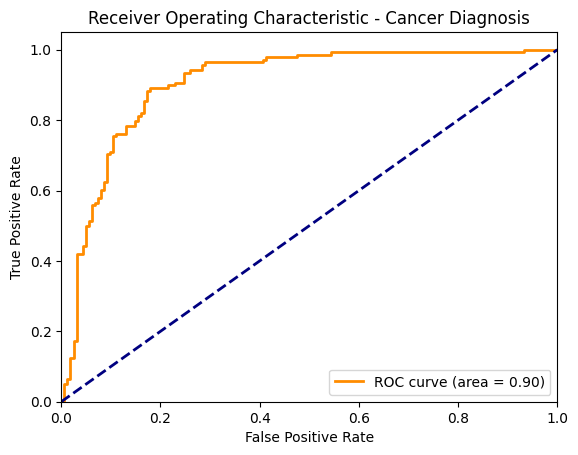

In [ ]:
'''
ROC 커브의 실생활 활용 예시

의료 진단:
예시: 암 진단 시스템에서 ROC 커브를 사용하여 모델의 성능을 평가합니다. 예를 들어, 모델이 환자가 암에 걸릴 확률을 예측할 때, 다양한 임계값을 설정하여 민감도와 특이도를 비교합니다. 높은 민감도는 암 환자를 놓치지 않도록 하고, 높은 특이도는 건강한 사람을 잘못 진단하지 않도록 합니다.
활용: ROC 커브를 통해 최적의 임계값을 선택하여 진단의 정확도를 높일 수 있습니다.

금융 사기 탐지:
예시: 신용 카드 사기 탐지 시스템에서 ROC 커브를 사용하여 모델의 성능을 평가합니다. 모델이 거래가 사기일 확률을 예측할 때, 다양한 임계값을 설정하여 민감도와 특이도를 비교합니다. 높은 민감도는 사기 거래를 놓치지 않도록 하고, 높은 특이도는 정상 거래를 잘못 탐지하지 않도록 합니다.
활용: ROC 커브를 통해 최적의 임계값을 선택하여 사기 탐지의 정확도를 높일 수 있습니다.

스팸 이메일 필터링:
예시: 이메일 필터링 시스템에서 ROC 커브를 사용하여 모델의 성능을 평가합니다. 모델이 이메일이 스팸일 확률을 예측할 때, 다양한 임계값을 설정하여 민감도와 특이도를 비교합니다. 높은 민감도는 스팸 이메일을 놓치지 않도록 하고, 높은 특이도는 정상 이메일을 잘못 필터링하지 않도록 합니다.
활용: ROC 커브를 통해 최적의 임계값을 선택하여 스팸 필터링의 정확도를 높일 수 있습니다.

ROC 커브의 장단점
장점:
모델 성능 평가: 다양한 임계값에서 모델의 성능을 평가할 수 있어, 모델의 전반적인 성능을 파악하는 데 유용합니다.
비교 가능: 여러 모델의 성능을 비교할 때 유용합니다. AUC(Area Under the Curve) 값을 통해 모델의 성능을 정량적으로 비교할 수 있습니다.
임계값 선택: 최적의 임계값을 선택하여 모델의 성능을 최적화할 수 있습니다.
단점:
이진 분류에 한정: 주로 이진 분류 문제에 사용되며, 다중 클래스 분류 문제에는 적합하지 않습니다.
데이터 불균형 문제: 데이터가 불균형한 경우, ROC 커브가 모델의 성능을 과대평가할 수 있습니다.
'''

# 암 진단 예시

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# 데이터 생성 (암 진단 예시)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측 확률 계산
y_score = model.predict_proba(X_test)[:, 1]

# ROC 커브 계산
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Cancer Diagnosis')
plt.legend(loc="lower right")
plt.show()


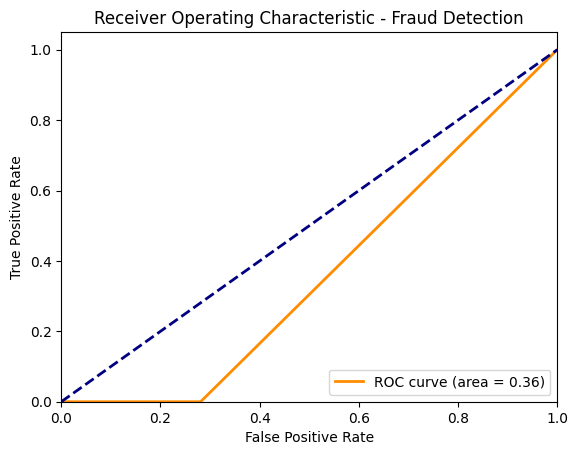

In [ ]:
# 금융 사기 탐지 예시

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# 데이터 생성 (금융 사기 탐지 예시)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, weights=[0.99, 0.01], random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 예측 확률 계산
y_score = model.predict_proba(X_test)[:, 1]

# ROC 커브 계산
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Fraud Detection')
plt.legend(loc="lower right")
plt.show()


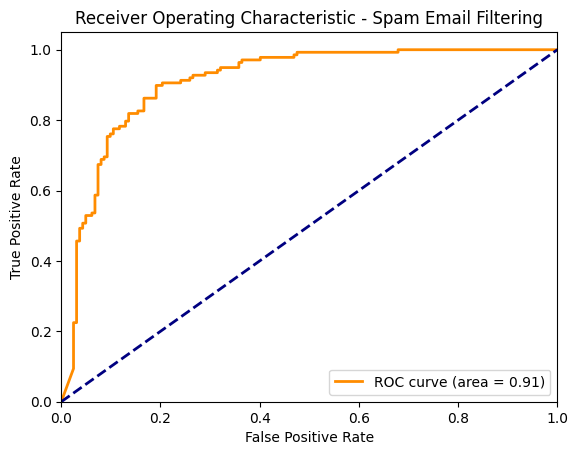

In [ ]:
# 스팸 이메일 필터링 예시

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

# 데이터 생성 (스팸 이메일 필터링 예시)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 나이브 베이즈 모델 생성 및 훈련
model = GaussianNB()
model.fit(X_train, y_train)

# 예측 확률 계산
y_score = model.predict_proba(X_test)[:, 1]

# ROC 커브 계산
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Spam Email Filtering')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Confusion Matrix:
[[27  5]
 [ 5 23]]


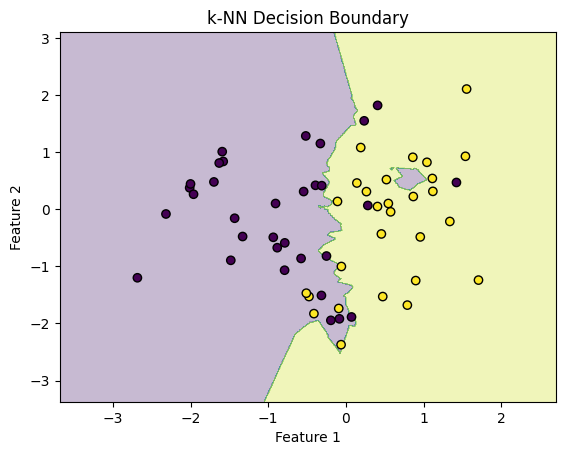

In [ ]:
# 시간 굉장히 많이 소요되는 알고리즘임

'''
k-최근접 이웃 (k-Nearest Neighbors, k-NN)
원리
k-NN은 새로운 데이터 포인트를 가장 가까운 k개의 이웃 데이터 포인트의 클래스로 분류하는 non-parameter 알고리즘입니다. (고정된 수의 매개변수 X)
거리 측정 방법(유클리드 거리, 맨해튼 거리 등)을 사용하여 가장 가까운 이웃을 찾습니다.

단계적 절차
거리 계산: 새로운 데이터 포인트와 학습 데이터 포인트 간의 거리를 계산합니다.
이웃 선택: 가장 가까운 k개의 이웃을 선택합니다.
클래스 결정: 선택된 이웃의 클래스 중 가장 많이 나타나는 클래스를 새로운 데이터 포인트의 클래스로 결정합니다.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 생성
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# n_samples: 샘플 수, n_features: 특징 수, n_informative: 유용한 특징 수, n_redundant: 중복된 특징 수, random_state: 랜덤 시드

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# train_test_split: 데이터를 학습용과 테스트용으로 분할, test_size: 테스트 데이터 비율, random_state: 랜덤 시드

# 정규화
scaler = StandardScaler()  # StandardScaler 객체 생성
X_train = scaler.fit_transform(X_train)  # 학습 데이터 정규화
X_test = scaler.transform(X_test)  # 테스트 데이터 정규화

# k-NN 모델 생성 및 훈련
k = 5  # k 값 설정
knn = KNeighborsClassifier(n_neighbors=k)  # k-NN 분류기 객체 생성
knn.fit(X_train, y_train)  # 학습 데이터로 모델 훈련

# 예측
y_pred = knn.predict(X_test)  # 테스트 데이터에 대한 예측

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print(f'Accuracy: {accuracy:.2f}')  # 정확도 출력
print('Classification Report:')
print(classification_report(y_test, y_pred))  # 분류 보고서 출력
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))  # 혼동 행렬 출력

# 시각화
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # x축 범위 설정
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # y축 범위 설정
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # 그리드 생성
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # 그리드 포인트에 대한 예측
    Z = Z.reshape(xx.shape)  # 예측 결과를 그리드 형태로 변환
    plt.contourf(xx, yy, Z, alpha=0.3)  # 결정 경계 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')  # 데이터 포인트 시각화
    plt.title(title)  # 그래프 제목 설정
    plt.xlabel('Feature 1')  # x축 라벨 설정
    plt.ylabel('Feature 2')  # y축 라벨 설정
    plt.show()  # 그래프 출력

plot_decision_boundary(knn, X_test, y_test, 'k-NN Decision Boundary')  # 결정 경계 시각화 함수 호출


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.75      0.78        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Confusion Matrix:
[[27  5]
 [ 7 21]]


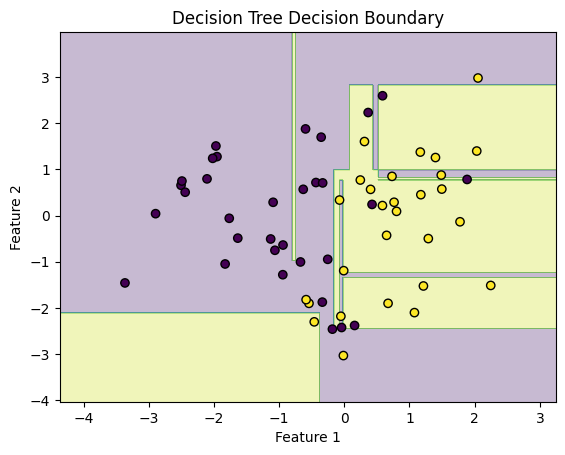

In [ ]:
'''
트리 모델 (Decision Tree)

원리
의사결정 트리는 데이터를 분할하여 의사결정을 내리는 트리 구조의 모델입니다. 각 노드는 특정 특징에 대한 조건을 기반으로 데이터를 분할하며, 이 과정에서 불순도(impurity)를 감소시키는 방향으로 분할합니다. 불순도는 주로 지니 불순도(Gini impurity)나 엔트로피(entropy)를 사용하여 측정합니다.

단계적 절차

특징 선택: 데이터를 가장 잘 분할할 수 있는 특징을 선택합니다. 이때, 불순도를 가장 많이 감소시키는 특징을 선택합니다.

노드 생성: 선택된 특징을 기준으로 데이터를 분할하여 노드를 생성합니다.

반복: 각 자식 노드에 대해 위 과정을 반복하여 트리를 확장합니다. 각 분할에서 불순도를 감소시키는 방향으로 데이터를 분할합니다.

종료 조건: 모든 데이터가 동일한 클래스로 분류되거나, 더 이상 분할할 수 없을 때 트리 생성을 종료합니다.
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 생성
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# n_samples: 샘플 수, n_features: 특징 수, n_informative: 유용한 특징 수, n_redundant: 중복된 특징 수, random_state: 랜덤 시드

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# train_test_split: 데이터를 학습용과 테스트용으로 분할, test_size: 테스트 데이터 비율, random_state: 랜덤 시드

# 의사결정 트리 모델 생성 및 훈련
tree = DecisionTreeClassifier(criterion='gini', random_state=42)  # 지니 불순도를 사용하여 트리 생성
tree.fit(X_train, y_train)  # 학습 데이터로 모델 훈련

# 예측
y_pred = tree.predict(X_test)  # 테스트 데이터에 대한 예측

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
print(f'Accuracy: {accuracy:.2f}')  # 정확도 출력
print('Classification Report:')
print(classification_report(y_test, y_pred))  # 분류 보고서 출력
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))  # 혼동 행렬 출력

# 시각화
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # x축 범위 설정
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # y축 범위 설정
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # 그리드 생성
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # 그리드 포인트에 대한 예측
    Z = Z.reshape(xx.shape)  # 예측 결과를 그리드 형태로 변환
    plt.contourf(xx, yy, Z, alpha=0.3)  # 결정 경계 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')  # 데이터 포인트 시각화
    plt.title(title)  # 그래프 제목 설정
    plt.xlabel('Feature 1')  # x축 라벨 설정
    plt.ylabel('Feature 2')  # y축 라벨 설정
    plt.show()  # 그래프 출력

plot_decision_boundary(tree, X_test, y_test, 'Decision Tree Decision Boundary')  # 결정 경계 시각화 함수 호출


In [ ]:
'''
배깅과 랜덤 포레스트 (Bagging and Random Forest)

원리
배깅은 여러 모델을 학습시키고 그 예측을 결합하여 성능을 향상시키는 앙상블 기법입니다. 랜덤 포레스트는 배깅의 일종으로, 여러 의사결정 트리를 학습시켜 예측을 결합합니다.

단계적 절차 (배깅)

부트스트랩 샘플링: 원본 데이터에서 여러 부트스트랩 샘플을 생성합니다.

모델 학습: 각 부트스트랩 샘플에 대해 개별 모델을 학습시킵니다.

예측 결합: 모든 모델의 예측을 결합하여 최종 예측을 만듭니다.

단계적 절차 (랜덤 포레스트)

데이터 준비: 학습 데이터와 레이블을 준비합니다.

부트스트랩 샘플링: 원본 데이터에서 여러 부트스트랩 샘플을 생성합니다.

특징 선택: 각 노드에서 무작위로 선택된 특징의 부분 집합을 사용하여 데이터를 분할합니다.

모델 학습: 각 부트스트랩 샘플에 대해 의사결정 트리를 학습시킵니다.

예측 결합: 모든 트리의 예측을 결합하여 최종 예측을 만듭니다.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 데이터 생성
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# n_samples: 샘플 수, n_features: 특징 수, n_informative: 유용한 특징 수, n_redundant: 중복된 특징 수, random_state: 랜덤 시드

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# train_test_split: 데이터를 학습용과 테스트용으로 분할, test_size: 테스트 데이터 비율, random_state: 랜덤 시드

# 배깅 모델 생성 및 훈련
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
# base_estimator: 기본 모델, n_estimators: 모델 수, random_state: 랜덤 시드
bagging.fit(X_train, y_train)  # 학습 데이터로 모델 훈련

# 예측
y_pred_bagging = bagging.predict(X_test)  # 테스트 데이터에 대한 예측

# 모델 평가
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)  # 정확도 계산
print(f'Bagging Accuracy: {accuracy_bagging:.2f}')  # 정확도 출력
print('Bagging Classification Report:')
print(classification_report(y_test, y_pred_bagging))  # 분류 보고서 출력
print('Bagging Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_bagging))  # 혼동 행렬 출력

# 랜덤 포레스트 모델 생성 및 훈련
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# n_estimators: 트리 수, random_state: 랜덤 시드
random_forest.fit(X_train, y_train)  # 학습 데이터로 모델 훈련

# 예

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.80
Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.80      0.80      0.80        60

Bagging Confusion Matrix:
[[28  4]
 [ 8 20]]


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting Accuracy: 0.83
Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

Boosting Confusion Matrix:
[[28  4]
 [ 6 22]]


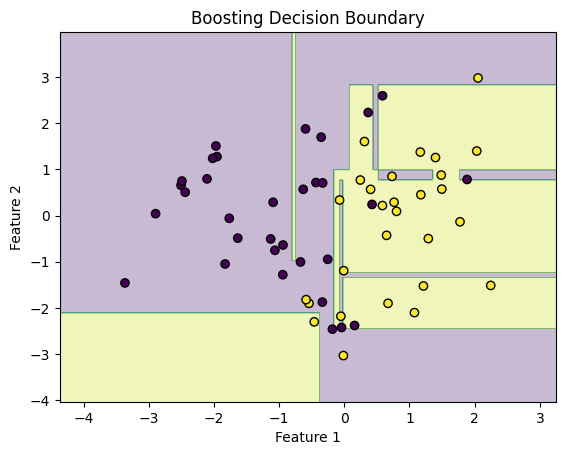

In [ ]:
'''
부스팅 (Boosting)

원리
부스팅은 여러 약한 학습기를 순차적으로 학습시켜 강한 학습기를 만드는 앙상블 기법입니다. 각 학습기는 이전 학습기의 오류를 보완합니다.

단계적 절차

초기 모델 학습: 첫 번째 약한 학습기를 학습시킵니다.

오류 계산: 첫 번째 학습기의 예측 오류를 계산합니다.

가중치 업데이트: 오류가 큰 데이터 포인트에 더 높은 가중치를 부여하여 다음 학습기를 학습시킵니다.

반복: 위 과정을 여러 번 반복하여 약한 학습기를 순차적으로 학습시킵니다.

예측 결합: 모든 학습기의 예측을 결합하여 최종 예측을 만듭니다.
'''
import numpy as np  # 수치 계산을 위한 numpy 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib 라이브러리
from sklearn.datasets import make_classification  # 데이터 생성을 위한 함수
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 함수
from sklearn.ensemble import AdaBoostClassifier  # 부스팅 알고리즘을 위한 클래스
from sklearn.tree import DecisionTreeClassifier  # 의사결정 트리 알고리즘을 위한 클래스
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 모델 평가를 위한 함수

# 데이터 생성
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# n_samples: 샘플 수, n_features: 특징 수, n_informative: 유용한 특징 수, n_redundant: 중복된 특징 수, random_state: 랜덤 시드

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# train_test_split: 데이터를 학습용과 테스트용으로 분할, test_size: 테스트 데이터 비율, random_state: 랜덤 시드

# 부스팅 모델 생성 및 훈련
boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
# base_estimator: 기본 모델, n_estimators: 모델 수, random_state: 랜덤 시드
boosting.fit(X_train, y_train)  # 학습 데이터로 모델 훈련

# 예측
y_pred_boosting = boosting.predict(X_test)  # 테스트 데이터에 대한 예측

# 모델 평가
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)  # 정확도 계산
print(f'Boosting Accuracy: {accuracy_boosting:.2f}')  # 정확도 출력
print('Boosting Classification Report:')
print(classification_report(y_test, y_pred_boosting))  # 분류 보고서 출력
print('Boosting Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_boosting))  # 혼동 행렬 출력

# 시각화
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # x축 범위 설정
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # y축 범위 설정
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))  # 그리드 생성
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # 그리드 포인트에 대한 예측
    Z = Z.reshape(xx.shape)  # 예측 결과를 그리드 형태로 변환
    plt.contourf(xx, yy, Z, alpha=0.3)  # 결정 경계 시각화
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')  # 데이터 포인트 시각화
    plt.title(title)  # 그래프 제목 설정
    plt.xlabel('Feature 1')  # x축 라벨 설정
    plt.ylabel('Feature 2')  # y축 라벨 설정
    plt.show()  # 그래프 출력

plot_decision_boundary(boosting, X_test, y_test, 'Boosting Decision Boundary')  # 부스팅 결정 경계 시각화 함수 호출


In [ ]:
'''
배깅 (Bagging)
원리
배깅은 여러 모델을 병렬로 학습시키고, 그 예측을 결합하여 최종 예측을 만듭니다. 각 모델은 원본 데이터에서 부트스트랩 샘플링(중복을 허용한 무작위 샘플링)된 데이터로 학습됩니다.

특징
병렬 학습: 각 모델은 독립적으로 병렬로 학습됩니다.
부트스트랩 샘플링: 원본 데이터에서 여러 부트스트랩 샘플을 생성하여 각 모델을 학습시킵니다.
예측 결합: 모든 모델의 예측을 평균(회귀)하거나 다수결(분류)로 결합하여 최종 예측을 만듭니다.
과적합 감소: 배깅은 모델의 분산을 줄여 과적합을 방지하는 데 효과적입니다.



부스팅 (Boosting)
원리
부스팅은 여러 약한 학습기를 순차적으로 학습시켜 강한 학습기를 만듭니다. 각 학습기는 이전 학습기의 오류를 보완하도록 학습됩니다.

특징
순차 학습: 각 모델은 순차적으로 학습되며, 이전 모델의 오류를 보완합니다.
가중치 업데이트: 각 학습 단계에서 오류가 큰 데이터 포인트에 더 높은 가중치를 부여하여 다음 모델을 학습시킵니다.
예측 결합: 모든 모델의 예측을 가중 평균하여 최종 예측을 만듭니다.
강한 학습기 생성: 부스팅은 모델의 편향을 줄여 강한 학습기를 만드는 데 효과적입니다.

비교
학습 방식: 배깅은 병렬로 학습하고, 부스팅은 순차적으로 학습합니다.
목적: 배깅은 분산을 줄여 과적합을 방지하고, 부스팅은 편향을 줄여 예측 성능을 향상시킵니다.
데이터 샘플링: 배깅은 부트스트랩 샘플링을 사용하고, 부스팅은 모든 데이터를 사용하지만 가중치를 조정합니다.
'''

'\n배깅 (Bagging)\n원리\n배깅은 여러 모델을 병렬로 학습시키고, 그 예측을 결합하여 최종 예측을 만듭니다. 각 모델은 원본 데이터에서 부트스트랩 샘플링(중복을 허용한 무작위 샘플링)된 데이터로 학습됩니다.\n\n특징\n병렬 학습: 각 모델은 독립적으로 병렬로 학습됩니다.\n부트스트랩 샘플링: 원본 데이터에서 여러 부트스트랩 샘플을 생성하여 각 모델을 학습시킵니다.\n예측 결합: 모든 모델의 예측을 평균(회귀)하거나 다수결(분류)로 결합하여 최종 예측을 만듭니다.\n과적합 감소: 배깅은 모델의 분산을 줄여 과적합을 방지하는 데 효과적입니다.\n\n\n\n부스팅 (Boosting)\n원리\n부스팅은 여러 약한 학습기를 순차적으로 학습시켜 강한 학습기를 만듭니다. 각 학습기는 이전 학습기의 오류를 보완하도록 학습됩니다.\n\n특징\n순차 학습: 각 모델은 순차적으로 학습되며, 이전 모델의 오류를 보완합니다.\n가중치 업데이트: 각 학습 단계에서 오류가 큰 데이터 포인트에 더 높은 가중치를 부여하여 다음 모델을 학습시킵니다.\n예측 결합: 모든 모델의 예측을 가중 평균하여 최종 예측을 만듭니다.\n강한 학습기 생성: 부스팅은 모델의 편향을 줄여 강한 학습기를 만드는 데 효과적입니다.\n\n비교\n학습 방식: 배깅은 병렬로 학습하고, 부스팅은 순차적으로 학습합니다.\n목적: 배깅은 분산을 줄여 과적합을 방지하고, 부스팅은 편향을 줄여 예측 성능을 향상시킵니다.\n데이터 샘플링: 배깅은 부트스트랩 샘플링을 사용하고, 부스팅은 모든 데이터를 사용하지만 가중치를 조정합니다.\n'

In [ ]:
'''
부트스트랩 샘플링의 특징

중복 허용: 샘플링 과정에서 동일한 데이터 포인트가 여러 번 선택될 수 있습니다.
무작위 추출: 데이터셋에서 무작위로 샘플을 추출합니다.
샘플 크기: 추출된 샘플의 크기는 원본 데이터셋과 동일합니다.
예시
예를 들어, 원본 데이터셋이 [1, 2, 3, 4, 5]인 경우, 부트스트랩 샘플링을 통해 [2, 3, 3, 5, 1]과 같은 샘플이 생성될 수 있습니다.

사용 사례
부트스트랩 샘플링은 주로 다음과 같은 경우에 사용됩니다:

모델 평가: 모델의 성능을 평가하기 위해 여러 부트스트랩 샘플을 생성하여 교차 검증을 수행합니다.
앙상블 학습: 배깅(Bagging)과 같은 앙상블 기법에서 여러 모델을 학습시키기 위해 사용됩니다.
'''

import numpy as np

# 원본 데이터셋
data = np.array([1, 2, 3, 4, 5])

# 부트스트랩 샘플링
n_samples = len(data)
bootstrap_sample = np.random.choice(data, size=n_samples, replace=True)

print("Original Data:", data)
print("Bootstrap Sample:", bootstrap_sample)

Original Data: [1 2 3 4 5]
Bootstrap Sample: [2 2 3 1 2]


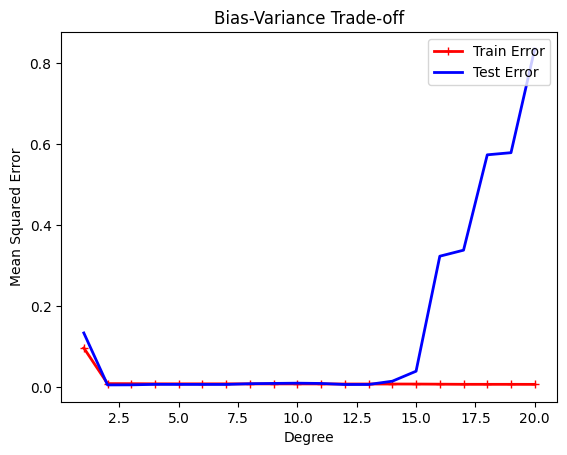

In [ ]:
'''
편향-분산 트레이드오프 (Bias-Variance Trade-off)

편향 (Bias)
정의: 모델이 실제 데이터의 패턴을 얼마나 잘 학습하지 못하는지를 나타냅니다. 높은 편향은 모델이 단순화되어 데이터의 복잡한 패턴을 학습하지 못하는 경우를 의미합니다.
결과: 높은 편향은 **언더피팅(Underfitting)**을 초래하여 훈련 데이터와 테스트 데이터 모두에서 성능이 낮아집니다.

분산 (Variance)
정의: 모델이 학습 데이터의 작은 변동에 얼마나 민감한지를 나타냅니다. 높은 분산은 모델이 학습 데이터의 노이즈까지 학습하여 일반화 성능이 떨어지는 경우를 의미합니다.
결과: 높은 분산은 **오버피팅(Overfitting)**을 초래하여 훈련 데이터에서는 성능이 높지만 테스트 데이터에서는 성능이 낮아집니다.

트레이드오프
트레이드오프: 편향과 분산은 서로 상충하는 관계에 있습니다. 모델의 복잡성을 증가시키면 편향은 줄어들지만 분산은 증가하고, 반대로 모델의 복잡성을 줄이면 분산은 줄어들지만 편향은 증가합니다.
목표: 최적의 모델은 편향과 분산의 균형을 맞추어 일반화 성능을 최대화하는 것입니다.
'''
import numpy as np  # 수치 계산을 위한 numpy 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 matplotlib 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 함수
from sklearn.preprocessing import PolynomialFeatures  # 다항 특징 생성을 위한 클래스
from sklearn.linear_model import LinearRegression  # 선형 회귀 모델을 위한 클래스
from sklearn.metrics import mean_squared_error  # 평균 제곱 오차 계산을 위한 함수

# 데이터 생성
np.random.seed(42)  # 랜덤 시드 설정
X = np.random.rand(100, 1)  # 0과 1 사이의 랜덤 값 100개 생성
y = 4 * (X - 0.5) ** 2 + np.random.randn(100, 1) * 0.1  # 비선형 함수와 노이즈를 포함한 타겟 값 생성

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# train_test_split: 데이터를 학습용과 테스트용으로 분할, test_size: 테스트 데이터 비율, random_state: 랜덤 시드

# 모델 복잡성에 따른 편향-분산 트레이드오프 시각화
train_errors, test_errors = [], []  # 학습 및 테스트 오류를 저장할 리스트 초기화
degrees = range(1, 21)  # 다항 회귀의 차수 범위 설정

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)  # 다항 특징 생성
    X_poly_train = poly_features.fit_transform(X_train)  # 학습 데이터에 다항 특징 적용
    X_poly_test = poly_features.transform(X_test)  # 테스트 데이터에 다항 특징 적용

    lin_reg = LinearRegression()  # 선형 회귀 모델 생성
    lin_reg.fit(X_poly_train, y_train)  # 학습 데이터로 모델 훈련

    y_train_predict = lin_reg.predict(X_poly_train)  # 학습 데이터에 대한 예측
    y_test_predict = lin_reg.predict(X_poly_test)  # 테스트 데이터에 대한 예측

    train_errors.append(mean_squared_error(y_train, y_train_predict))  # 학습 오류 계산 및 저장
    test_errors.append(mean_squared_error(y_test, y_test_predict))  # 테스트 오류 계산 및 저장

# 시각화
plt.plot(degrees, train_errors, "r-+", linewidth=2, label="Train Error")  # 학습 오류 시각화
plt.plot(degrees, test_errors, "b-", linewidth=2, label="Test Error")  # 테스트 오류 시각화
plt.xlabel("Degree")  # x축 라벨 설정
plt.ylabel("Mean Squared Error")  # y축 라벨 설정
plt.legend(loc="upper right")  # 범례 위치 설정
plt.title("Bias-Variance Trade-off")  # 그래프 제목 설정
plt.show()  # 그래프 출력
